In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fastai.vision import *

TRAIN = Path('../input/the-nature-conservancy-fisheries-monitoring/train/')
PATH_WORKING = Path('/kaggle/working/')

In [ ]:
**1. Other (meaning that there are fish present but not in the above categories)**

**2. SHARK (Shark, duh)**

**3. ALB (Albacore tuna)**

**4. LAG (Opah)**

**5. NoF (No Fish)**

**6. DOL (Mahi Mahi)**

**7. YFT (Yellowfin tuna)**

**8. BET (Bigeye tuna)**

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'] 8

In [ ]:
src = ImageList.from_folder(path=TRAIN).split_by_rand_pct(0.2).label_from_folder().add_test_folder(TEST)
tfms = get_transforms()
data = src.transform(tfms,size=(670,1192)).databunch(bs=8).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet50, metrics=[accuracy],model_dir='/kaggle/working/')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,3e-3)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage1-fisheries')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1,slice(3e-5,3e-4))

In [ ]:
learn.save('stage2-fisheries')

In [ ]:
learn.export('/kaggle/working/export.pkl')

In [32]:
from fastai.vision import *

In [50]:
os.listdir()

['img_00005.jpg',
 'img_03452.jpg',
 'img2.jpg',
 'Overfishing.ipynb',
 'img_00033.jpg',
 'img3.jpg',
 'export.pkl',
 'download.jpg',
 '.ipynb_checkpoints']

In [51]:
md = load_learner('','export.pkl')

In [60]:
TRAIN = Path('')
print(TRAIN.ls())

[PosixPath('img_00005.jpg'), PosixPath('img_03452.jpg'), PosixPath('Overfishing.ipynb'), PosixPath('img_00033.jpg'), PosixPath('img3.jpg'), PosixPath('export.pkl'), PosixPath('download.jpg'), PosixPath('.ipynb_checkpoints')]


In [61]:
src = ImageList.from_folder(path=TRAIN)

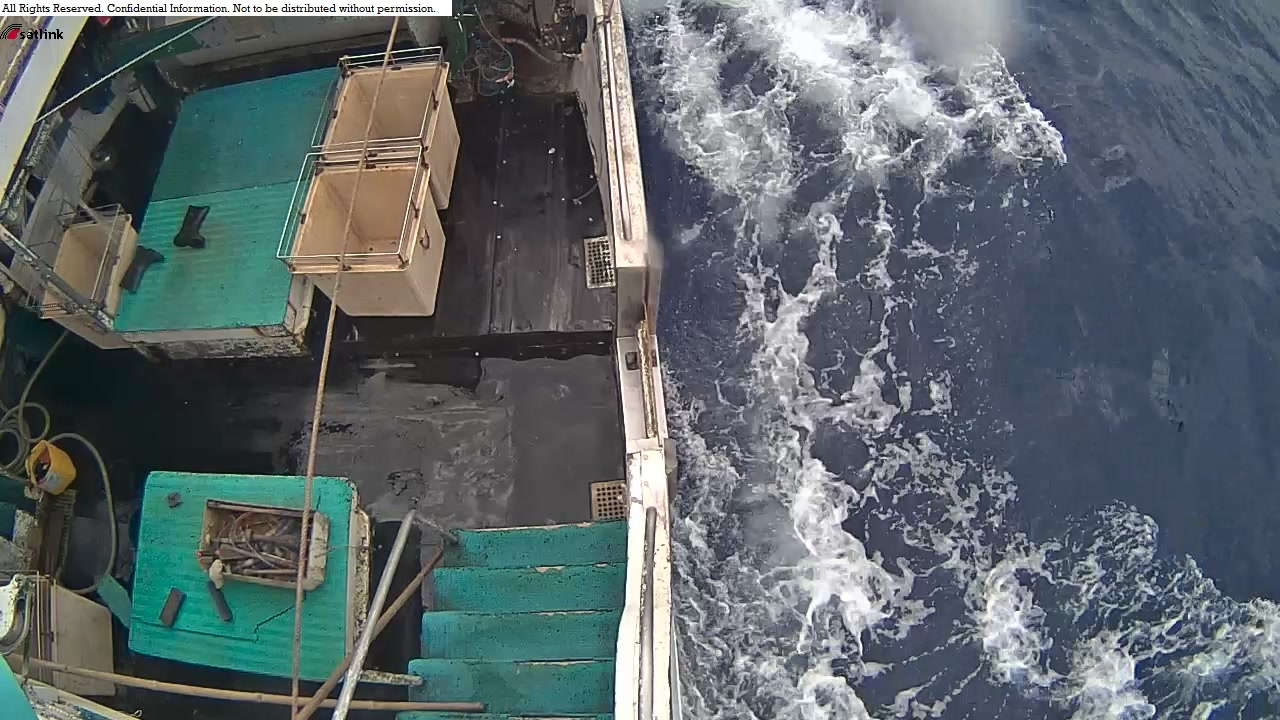

In [65]:
src[0]

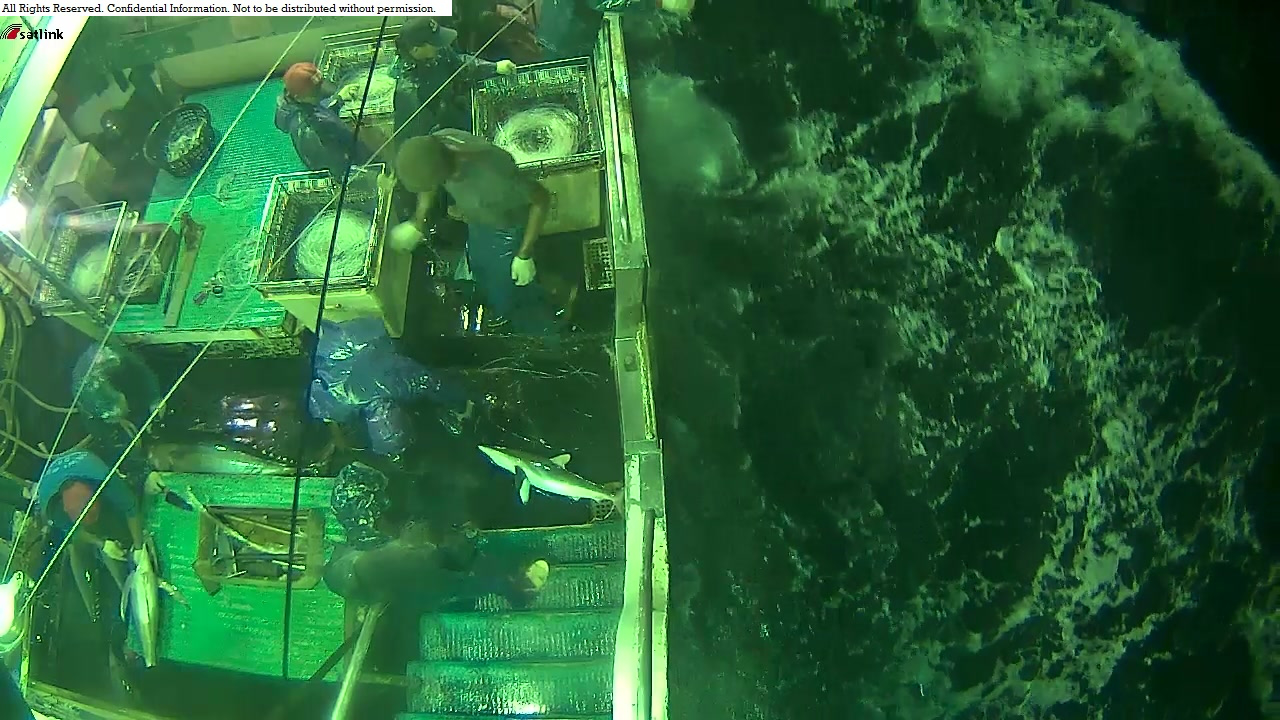

In [57]:
src[3]

In [58]:
md.predict(src[3])

(Category SHARK,
 tensor(6),
 tensor([1.1756e-02, 8.8763e-04, 1.0819e-04, 1.7354e-05, 2.3772e-04, 8.8859e-04,
         9.8572e-01, 3.8340e-04]))

In [42]:
result


(Category NoF,
 tensor(4),
 tensor([1.3480e-02, 3.1831e-03, 3.3837e-05, 9.1038e-04, 7.5738e-01, 2.1899e-01,
         3.0154e-04, 5.7254e-03]))

In [44]:
type(result[0])

fastai.core.Category

In [49]:
str(result[0])

'NoF'

In [48]:

print(int(result[1]))
print(list(result[2]))

4
[tensor(0.0135), tensor(0.0032), tensor(3.3837e-05), tensor(0.0009), tensor(0.7574), tensor(0.2190), tensor(0.0003), tensor(0.0057)]
